# K近邻（KNN）
----

> 本文内容为个人学习笔记，文中内容均来自网络[1].，如有侵犯版权，请告知。

## 算法简介


#### 1.1 基本概念

**KNN**的全称是K Nearest Neighbors，意思是K个最近的邻居。

**KNN** 于 1967年由 Cover T 和 Hart P 提出的一种基本分类与回归方法。**KNN**算法是有监督学习中的分类算法，它和另一个机器学习算法**Kmeans**有点像（Kmeans是无监督学习算法）。

**工作原理：** 在一个样本数据集合，也称作为训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一个数据与所属分类的对应关系。输入没有标签的新数据后，将新的数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取样本最相似数据(最近邻)的分类标签。一般来说，我们只选择样本数据集中前k个最相似的数据，这就是k-近邻算法中k的出处，通常k是不大于20的整数。最后，选择k个最相似数据中出现次数最多的分类，作为新数据的分类。




学习了一些基本概念，咱们来看下一幅来自维基百科上的图，引用[5]：

![knn-00.png](knn-00.png)

如上图所示，有**两类**不同的样本数据，分别用蓝色的小正方形和红色的小三角形表示，而图正中间的那个绿色的圆所标示的数据则是**待分类的数据**。这也就是我们的目的，来了一个新的数据点，我要得到它的类别是什么？好的，下面我们根据k近邻的思想来给绿色圆点进行分类。

- 如果$K=3$，绿色圆点的最邻近的3个点是2个红色小三角形和1个蓝色小正方形，少数从属于多数，基于统计的方法，判定绿色的这个待分类点属于红色的三角形一类。
- 如果$K=5$，绿色圆点的最邻近的5个邻居是2个红色三角形和3个蓝色的正方形，还是少数从属于多数，基于统计的方法，判定绿色的这个待分类点属于蓝色的正方形一类。

从上面例子我们可以看出，**k近邻**的算法思想非常的简单，也非常的容易理解，但是要想一个算法在实际应用中**work**，需要注意的不少。~比如$k$怎么确定的，$k$为多少效果最好呢？所谓的**最近邻**又是如何来判断给定呢？我们接着往下学习。


#### 1.2 基本要素

1). $K$的取值， 一般采用[交叉验证][2][3]来取最优的$K$值;  
2). 距离度量, $L_{p}$距离：误差绝对值$p$次方求和再求$p$次根。 欧式距离： $p=2$的$L_{p}$距离。曼哈顿距离：$p=1$的$L_{p}$距离。$p$为无穷大时，$L_{p}$距离为各个维度上距离的最大值；    
3). 分类决策规则，也就是如何根据$K$个最近邻决定待测对象的分类。$K$最近邻的分类决策规则一般选用**多数表决**

#### 1.3 基本执行步骤

1). 计算待测对象和训练集合中每个样本点的欧式距离（$L_{p}$）  
2). 对上面的所有距离值排序  
3). 选取距离最小的K个点  
4). 确定前K个点所在类别的出现频率；  
5). 返回前K个点中出现频率最高的类别作为测试数据的预测分类



## KNN特点

KNN是一种**非参**，**惰性**的算法模型。 什么是非参，什么是惰性呢？

**非参**的意思并不是说这个算法不需要参数，而是意味着这个模型不会对数据做出任何的假设，与之相对的是线性回归（我们总会假设线性回归是一条直线）。也就是说KNN建立的模型结构是根据数据来决定的，这也比较符合现实的情况，毕竟在现实中的情况往往与理论上的假设是不相符的。

**惰性**又是什么意思呢？想想看，同样是分类算法，逻辑回归需要先对数据进行大量训练（tranning），最后才会得到一个算法模型。而KNN算法却不需要，它没有明确的训练数据的过程，或者说这个过程很快。

#### 2.1 KNN算法的优势和劣势

**KNN算法优点**
 
1). 简单易用，相比其他算法，KNN算是比较简洁明了的算法。即使没有很高的数学基础也能搞清楚它的原理。  
2). 模型训练时间快，上面说到KNN算法是惰性的，这里也就不再过多讲述。 
3). 预测效果好。  
4). 对异常值不敏感  

**KNN算法缺点**

1).对内存要求较高，因为该算法存储了所有训练数据  
2).预测阶段可能很慢  
3).对不相关的功能和数据规模敏感  

至于什么时候应该选择使用KNN算法，sklearn的这张图给了我们一个答案。  

![knn-01.png](./knn-01.png)


$$简单得说，当需要使用分类算法，且数据比较大的时候就可以尝试使用KNN算法进行分类。$$

## 代码实现

**思考：**

- 样本属性如何选择？
- 如何计算两个对象间距离？
- 当样本各属性的类型和尺度不同时如何处理？
- 各属性不同重要程度如何处理？
- 模型的好坏如何评估？

**使用k-近邻算法分类一个电影是爱情片还是动作片：**

![knn-02.png](knn-02.png)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""
函数说明：创建数据集

Parameters:
    无
Returns:
    group - 数据集
    labels - 分类标签
Modify：
    2021-09-25
"""

def createDataSet():
    #四组二维特征
    group = np.array([[1,101],[5,89],[108,5],[115,8]])
    # 四组特征的标签
    labels = ['爱情片','爱情片','动作片','动作片']
    return group,labels

if __name__ == '__main__':
    # 创建数据集
    group,labels = createDataSet()
    # 打印数据集
    print(group)
    print(labels)
    

[[  1 101]
 [  5  89]
 [108   5]
 [115   8]]
['爱情片', '爱情片', '动作片', '动作片']


我们用散点图，看看效果

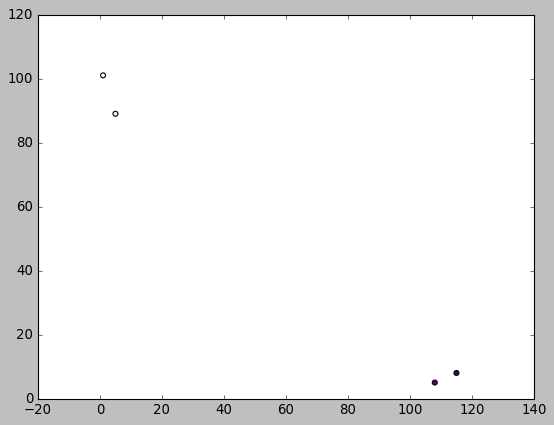

In [34]:

df = pd.DataFrame(group)
#df.head()
c = df[0]
plt.style.use('classic')
plt.scatter(df[0], df[1],c=c,cmap='RdPu')
plt.show()

参考资料：

[1]: https://www.cnblogs.com/geo-will/p/9771528.html
[2]: https://www.cnblogs.com/pinard/p/5992719.html
[3]: https://sklearn.apachecn.org/docs/master/30.html
[4]: https://zhuanlan.zhihu.com/p/61341071   
[5]: https://zhuanlan.zhihu.com/p/25994179 
[6]: https://cuijiahua.com/blog/2017/11/ml_1_knn.html